In [2]:
from ergochemics.standardize import standardize_smiles
import pandas as pd

In [4]:
out_path = "../artifacts/coreactants"
in_path = "../data/raw"

In [ ]:
fns = [
    "paired_coreactants_reference.tsv",
    "unpaired_coreactants_reference.tsv",
]

for fn in fns:
    df = pd.read_csv(f"{in_path}/{fn}", sep="\t")

    if fn.startswith("paired_"):
        df["Smiles 1"] = df["Smiles 1"].apply(standardize_smiles)
        df["Smiles 2"] = df["Smiles 2"].apply(standardize_smiles)
        df.columns = ["class_1", "class_2", "smiles_1", "smiles_2", "name_1", "name_2"]
    elif fn.startswith("unpaired_"):
        df["Smiles"] = df["Smiles"].apply(standardize_smiles)
        df.columns = ["class", "smiles", "name"]
    
    df.to_csv(f"{out_path}/{fn.split('_')[0]}.tsv", sep="\t", index=False)


[16:36:30] WARNING: not removing hydrogen atom without neighbors
[16:36:30] WARNING: not removing hydrogen atom without neighbors
[16:36:30] WARNING: not removing hydrogen atom without neighbors


In [33]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from ergochemics.draw import draw_molecule, draw_reaction

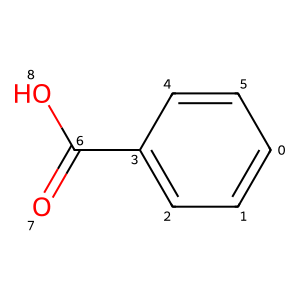

In [20]:
mol = Chem.MolFromSmiles("C1=CC=C(C=C1)C(=O)O")
display(
    SVG(
        draw_molecule(mol, size=(300, 300), draw_options={"addAtomIndices": True})
    )
)

In [21]:
Chem.GetDistanceMatrix(mol)

array([[0., 1., 2., 3., 2., 1., 4., 5., 5.],
       [1., 0., 1., 2., 3., 2., 3., 4., 4.],
       [2., 1., 0., 1., 2., 3., 2., 3., 3.],
       [3., 2., 1., 0., 1., 2., 1., 2., 2.],
       [2., 3., 2., 1., 0., 1., 2., 3., 3.],
       [1., 2., 3., 2., 1., 0., 3., 4., 4.],
       [4., 3., 2., 1., 2., 3., 0., 1., 1.],
       [5., 4., 3., 2., 3., 4., 1., 0., 2.],
       [5., 4., 3., 2., 3., 4., 1., 2., 0.]])

In [31]:
df=pd.read_parquet("/home/stef/cgr/data/raw/mapped_sprhea_240310_v3_mapped_no_subunits_x_min_rules.parquet")
df.head() 

,rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
0,0,NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...,[NH2:7][CH:6]([CH2:5][CH2:3][CH:1]=[O:4])[C:8]...,[#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...,"4;3,4,5,6,7,47;2>>0,1;0,1,2,3,4,5",819
1,1,CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O,[CH3:7][CH:5]([OH:8])[CH:4]([OH:6])[CH:1]([OH:...,([#6:1]-[#8:2].[#6:3]-[#8:4])>>([#6:1].[#6:3]=...,"5,6,7,8>>0,1,2;0",402
2,10,CCCCCCCCCCCC(=O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc...,[CH3:14][CH2:13][CH2:12][CH2:11][CH2:10][CH2:9...,[#6:1]-[#8:2].[#8:3]-[#15:4]>>[#6:1]-[#8:3].[#...,"11,13;2,1>>0,1;0,1",994
3,100,*C(=O)OCC(COP(=O)(O)OC1C(O)C(OP(=O)(O)O)C(O)C(...,[*:30][C:27](=[O:31])[O:25][CH2:23][CH:22]([CH...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],"15,16;0>>0,1;0",517
4,1000,CCC=O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)...,[CH3:5][CH2:3][CH:1]=[O:4].[NH2:13][C:12](=[O:...,[#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...,"2;3,4,5,6,7,47;0>>0,1;0,1,2,3,4,5",819


In [36]:
len(df)

13851

In [32]:
foo = {
    'smiles': ['C1=CC=C(C=C1)C(=O)O', 'asdf'],
    'whatever': [1, 2],
}
list(foo.items())

[('smiles', ['C1=CC=C(C=C1)C(=O)O', 'asdf']), ('whatever', [1, 2])]

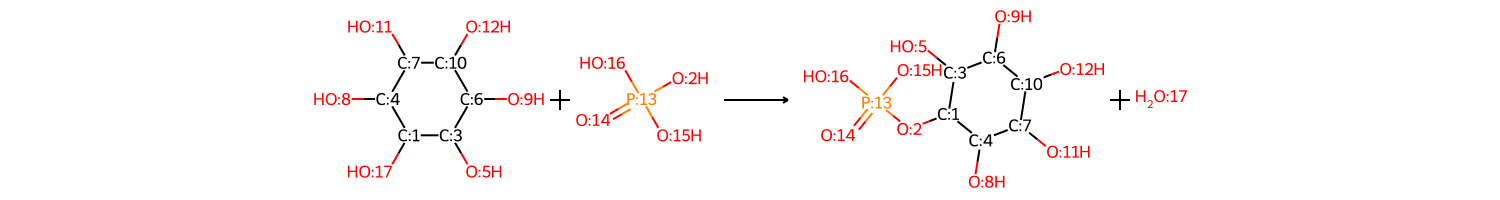

In [35]:
display(
    SVG(
        draw_reaction("[OH:9][CH:6]1[CH:3]([OH:5])[CH:1]([OH:17])[CH:4]([OH:8])[CH:7]([OH:11])[CH:10]1[OH:12].[O:14]=[P:13]([OH:2])([OH:15])[OH:16]>>[O:14]=[P:13]([OH:15])([OH:16])[O:2][CH:1]1[CH:3]([OH:5])[CH:6]([OH:9])[CH:10]([OH:12])[CH:7]([OH:11])[CH:4]1[OH:8].[OH2:17]")
    )
)